# Evaluation of SetFitABSA and Deberta Models

Summarization of results from manual evaluation and Comparison of results between SetFitABSA and Deberta models aspect based sentiment analysis

In [1]:
# Load the libraries

import pandas as pd
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

## Evaluation of Deberta Model results

Here we are synthesizing the results from the Deberta model along with the manual evaluation done on 100 random samples

In [2]:
# Read the data set which includes both manual evaluated results and the model labeled results
deberta_eval_df = pd.read_csv('../../data/evaluation_datasets/deberta_manual_eval.csv')

# let's look at the top row. For a given aspect, if the confidence score is under 0.7 then model lable is set to neutral. 
# If the confidence score is more than 0.7 then the model label is set to the 'Label' column
# In the row that is printed below, given that the confidence score is under 0.7, the model label is 'Neutral'
deberta_eval_df.head(1)

,business_id,review_id,Label,Score,Aspect,Reviews,Model Label,Manual Label
0,Ifw5wqcChnL4zBigtR7NKA,_WilyI_mvxoVBoHn7crnCQ,Negative,0.631905,Space,Super disappointed in this place! Their servic...,Neutral,Neutral


In [3]:
# Group the dataframe to create a confusion matrix with model label and manual label
deberta_eval_gp = deberta_eval_df.groupby(['Model Label','Manual Label'])['review_id'].count().reset_index()
deberta_eval_gp = deberta_eval_gp.pivot(index='Model Label', columns='Manual Label')['review_id'].fillna(0)

deberta_eval_gp 

Manual Label,Negative,Neutral,Positive
Model Label,,,
Negative,11.0,1.0,0.0
Neutral,3.0,14.0,5.0
Positive,0.0,11.0,55.0


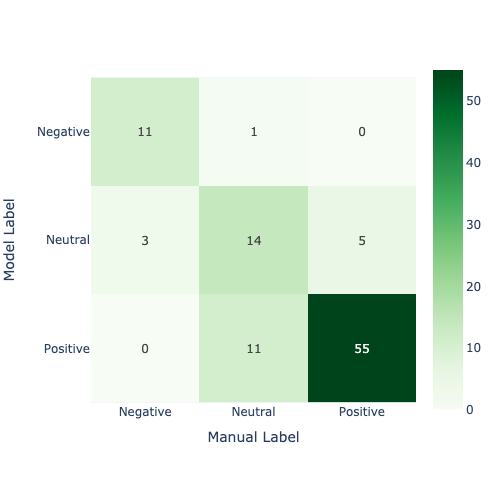

In [4]:
# Showing the image using Plotly express heatmap
fig = px.imshow(deberta_eval_gp, x=deberta_eval_gp.columns, y=deberta_eval_gp.index, \
                color_continuous_scale=px.colors.sequential.Greens, text_auto=True)
fig.update_layout(width=500,height=500)
fig.show("png")

In [5]:
# Let's print the accuracy 
deberta_accuracy = deberta_eval_df[deberta_eval_df['Model Label']==deberta_eval_df['Manual Label']]['review_id'].count()/\
            deberta_eval_df['review_id'].count()

print('Accuracy of the model (based on manual evaluation):', format(deberta_accuracy, ".1%"))

Accuracy of the model (based on manual evaluation): 80.0%


## Evaluation of SetFit ABSA Model results

Here we are synthesizing the results from the SetFit ABSA model along with the manual evaluation done on 100 random samples

In [6]:
# Read the data set which includes both manual evaluated results and the model labeled results
setfit_absa_eval_df = pd.read_csv('../../data/evaluation_datasets/SetFit_ABSA_manual_eval.csv')

# let's look at the top row. For a given aspect, 'aspects_extracted_model_label' shows if the model mentioned there were aspects 
# and 'has_aspects_manual_label' is a field which is manually labelled and it captures if aspects were extracted correctly
# by the model. There is Model label and Manual label which captures the sentiment for the aspect which was specified by the model
# and the one manually label by us

setfit_absa_eval_df.head(1)

,review_id,user_id,business_id,has_aspects_manual_label,aspects_extracted_model_label,aspect,Model Label,Manual Label,is_actual_restaurant
0,b_mLN6YOXK50s9id9vA6og,YtDiXgpiP0d5zDmtMEUOow,KC8_Rx4Orlsz8LIonCYXsA,Y,Y,food,positive,positive,Y


### Evaluating if Aspects were extracted when they were present

Let's first look at if aspects were extracted when they were present and we will use confusion matrix for the same

In [7]:
# Group the dataframe to create a confusion matrix with model label and manual label
setfit_absa_aspect_eval_gp = setfit_absa_eval_df.groupby(['has_aspects_manual_label','aspects_extracted_model_label'])\
                                                            ['review_id'].count().reset_index()

setfit_absa_aspect_eval_gp = setfit_absa_aspect_eval_gp.pivot(index='has_aspects_manual_label', \
                                                              columns='aspects_extracted_model_label')['review_id'].fillna(0)

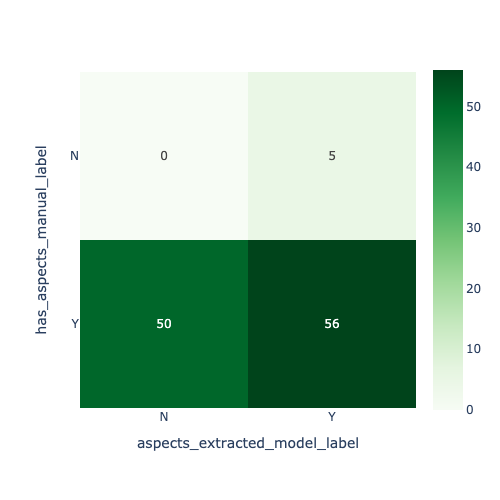

In [8]:
# Showing the image using Plotly express heatmap
fig = px.imshow(setfit_absa_aspect_eval_gp, x = setfit_absa_aspect_eval_gp.columns, y = setfit_absa_aspect_eval_gp.index, \
                color_continuous_scale=px.colors.sequential.Greens, text_auto=True)

fig.update_layout(width=500,height=500)

fig.show("png")

In [9]:
# Let's print the accuracy 
setfit_absa_aspect_accuracy = setfit_absa_eval_df[setfit_absa_eval_df['has_aspects_manual_label']==setfit_absa_eval_df['aspects_extracted_model_label']]\
                                    ['review_id'].count()/setfit_absa_eval_df['review_id'].count()

print('Accuracy of the Setfit ABSA model (to ):', format(setfit_absa_aspect_accuracy, ".1%"))

Accuracy of the Setfit ABSA model (to ): 50.5%


### Evaluating if Aspects extracted were correct

In [10]:
# Let's create a filtered data set which only includes reviews with aspect and sentiment when aspect was extract 
# by the model in cases when it was present 
filtered_setfit_absa_df = setfit_absa_eval_df[(setfit_absa_eval_df['has_aspects_manual_label']=='Y') & \
                            (setfit_absa_eval_df['aspects_extracted_model_label']=='Y')]

In [11]:
# Group the dataframe to create a confusion matrix with model label and manual label
setfit_absa_eval_gp = filtered_setfit_absa_df.groupby(['Model Label','Manual Label'])\
                            ['review_id'].count().reset_index()

setfit_absa_eval_gp = setfit_absa_eval_gp.pivot(index='Model Label', columns='Manual Label')['review_id'].fillna(0)

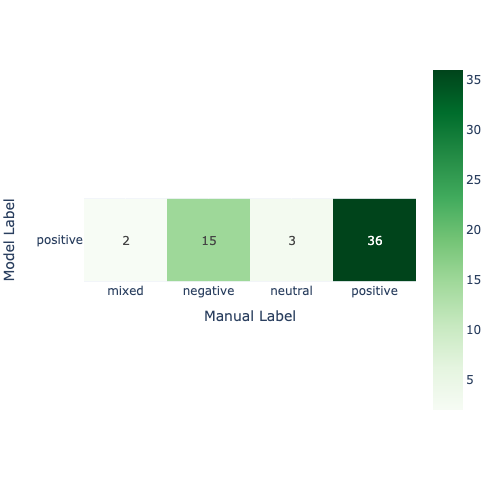

In [12]:
# Showing the image using Plotly express heatmap
fig = px.imshow(setfit_absa_eval_gp, x = setfit_absa_eval_gp.columns, y = setfit_absa_eval_gp.index, \
                color_continuous_scale=px.colors.sequential.Greens, text_auto=True)

fig.update_layout(width=500,height=500)

fig.show("png")

In [13]:
# Let's print the accuracy 
setfit_absa_accuracy = filtered_setfit_absa_df[filtered_setfit_absa_df['Model Label']==filtered_setfit_absa_df['Manual Label']]['review_id'].count()/\
            filtered_setfit_absa_df['review_id'].count()

print('Accuracy of the Setfit ABSA model (based on manual evaluation):', format(setfit_absa_accuracy, ".1%"))

Accuracy of the Setfit ABSA model (based on manual evaluation): 64.3%


## Comparison of results between SetFit ABSA and Deberta models

Now that we have evaluated results from SetFit ABSA and Deberta models, let's compare the results between the two

In [14]:
# Load the SetFit ABSA data set which has the inference from the mdoel for 2000 samples of data
temp_comp_setfit_absa = pd.read_csv('../../data/evaluation_datasets/SetFit_ABSA_manual_eval_comparison.csv')
temp_comp_setfit_absa.head(1)

,Unnamed: 0.2,index,Unnamed: 0.1,Unnamed: 0,review_id,user_id,business_id,stars_x,useful,funny,...,weather,services,environment,food atmosphere,family atmosphere,experiences,food quality way,seating area,scenery,price
0,0,0,18,1393,K-2es_s2Yc7hIiIrRD5W7w,2l0O1EI1m0yWjFo2zSt71w,gebiRewfieSdtt17PTW6Zg,4,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
setfit_columns = ['atmosphere', 'food', 'service', 'seating', 'experience', 'setting', 'outdoor setting', 'location', \
                  'quality food', 'food quality', 'food quality side', 'weather', 'services', 'environment',\
                   'food atmosphere', 'family atmosphere', 'experiences', 'food quality way', 'seating area', 'scenery', 'price']

comp_setfit_absa = pd.DataFrame()
for cols in setfit_columns:
    
    temp_comp_setfit_absa['Aspect'] = cols
    if len(comp_setfit_absa)==0:
        temp_setfit = temp_comp_setfit_absa[['review_id','Aspect',cols]]
        temp_setfit = temp_setfit.rename(columns={cols : 'Model Label'})
        comp_setfit_absa = temp_setfit
    else:
        temp_setfit = temp_comp_setfit_absa[['review_id','Aspect',cols]]
        temp_setfit = temp_setfit.rename(columns={cols : 'Model Label'})
        comp_setfit_absa = pd.concat([comp_setfit_absa, temp_setfit], ignore_index=True)

In [16]:
comp_setfit_absa.head(1)

,review_id,Aspect,Model Label
0,K-2es_s2Yc7hIiIrRD5W7w,atmosphere,positive


In [17]:
len(comp_setfit_absa)

18606

In [18]:
# Load the SetFit ABSA data set which has the inference from the mdoel for 2000 samples of data
temp_comp_deberta_absa = pd.read_csv('../../data/evaluation_datasets/deberta_manual_eval_comparison.csv')
temp_comp_deberta_absa.head(1)

,Unnamed: 0,business_id,review_id,ambiance_label,atmosphere_label,dessert_label,drinks_label,entertainment_label,experience_label,food_label,...,kid_friendly_score,location_score,noise_level_score,price_score,seating_score,service_score,setting_score,space_score,utilities_score,waiting_time_score
0,0,-3AooxIkg38UyUdlz5oXdw,Bl1VqhkkGx7EoUrDOCFW8w,NaN,Negative,NaN,NaN,NaN,NaN,Positive,...,NaN,0.517108,NaN,NaN,NaN,0.453472,NaN,0.537013,NaN,0.680859


In [19]:
# Create global variables to store results
global comp_deberta_absa 
comp_deberta_absa = pd.DataFrame()

In [20]:
def findSentimentPerReview(temp_df, aspect):
    """ 
    Purpose of the function is to find sentiment per reviews per aspect 
    For each review per aspect:
    - the label is marked negative, if the confidence score is >=0.7 and the label is negative
    - the label is marked positive, if the confidence score is >=0.7 and the label is positive

    Input: Dataframe with aspect label and aspect score for each review id
    Output: Dataframe with sentiment for all aspects and for the sample reviews
    """
    global comp_deberta_absa 
    
    label_col = aspect+'_label'
    score_col = aspect+'_score'

    temp_df['Aspect'] = aspect
    
    # For each review and aspect, the label is marked negative, if the confidence score is >=0.7 and the label is negative
    temp_df['Model Label'] = temp_df.apply(lambda x: 1 if (x[label_col]=='Negative') & \
                                        (x[score_col] >= 0.7) \
                                        else 'Positive' if (x[label_col]=='Positive') & (x[score_col] >= 0.7) else 'Neutral', axis=1)
    if len(comp_deberta_absa)==0:
        comp_deberta_absa = temp_df[['review_id','Aspect','Model Label']]
    else:
        comp_deberta_absa = pd.concat([comp_deberta_absa, temp_df[['review_id','Aspect','Model Label']]], ignore_index=True)

    # return the final data frame
    return comp_deberta_absa

In [21]:
# the aspect columns to consider 
columns = ['ambiance','atmosphere','dessert','drinks','entertainment','experience','food','food_portion','kid_friendly',\
           'location','noise_level', 'price','seating','service','setting','space','waiting_time']

# find sentiment per aspect for all reviews
for aspect in columns:
    findSentimentPerReview(temp_comp_deberta_absa[['review_id',aspect+'_label', aspect+'_score']], aspect)

# Print the result
comp_deberta_absa.head(1)

,review_id,Aspect,Model Label
0,Bl1VqhkkGx7EoUrDOCFW8w,ambiance,Neutral


In [22]:
len(comp_deberta_absa)

31501

In [23]:
len(comp_setfit_absa)

18606

In [24]:
# Combine the two model results using aspect and review id as keys
deberta_setfit_absa_df = pd.merge(comp_deberta_absa[comp_deberta_absa['Model Label']!=1], comp_setfit_absa, on=['Aspect','review_id'], how='left')

deberta_setfit_absa_df.head(1)

,review_id,Aspect,Model Label_x,Model Label_y
0,Bl1VqhkkGx7EoUrDOCFW8w,ambiance,Neutral,NaN


In [25]:
# Rename the column names and map it to the Deberta and SetFit ABSA column names 
deberta_setfit_absa_df = deberta_setfit_absa_df.rename(columns={'Model Label_x' : 'Deberta_Model_Results', 'Model Label_y' : 'Setfit_ABSA_Model_Results'})

In [26]:
# Group the dataframe to create a confusion matrix with Deberta model label and SetFit ABSA model label

deberta_setfit_absa_gp = deberta_setfit_absa_df.groupby(['Deberta_Model_Results','Setfit_ABSA_Model_Results'])\
                                                            ['review_id'].count().reset_index()

deberta_setfit_absa_gp = deberta_setfit_absa_gp.pivot(index='Deberta_Model_Results', \
                                                              columns='Setfit_ABSA_Model_Results')['review_id'].fillna(0)

deberta_setfit_absa_gp

Setfit_ABSA_Model_Results,positive
Deberta_Model_Results,
Neutral,203
Positive,830


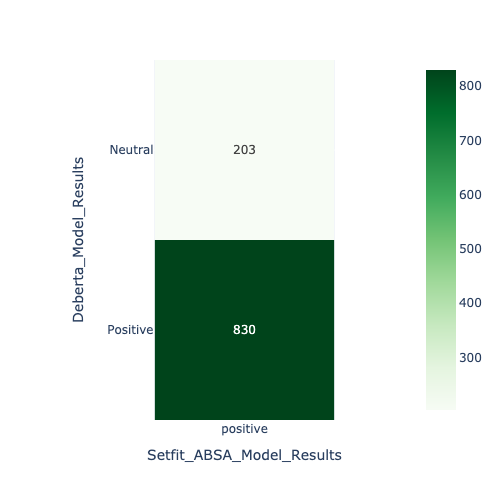

In [27]:
# Showing the image using Plotly express heatmap
fig = px.imshow(deberta_setfit_absa_gp, x = deberta_setfit_absa_gp.columns, y = deberta_setfit_absa_gp.index, \
                color_continuous_scale=px.colors.sequential.Greens, text_auto=True)

fig.update_layout(width=500,height=500)

fig.show("png")

In [28]:
# Done